In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from methods.load import load_observations


In [2]:
I = load_observations('inflow', data_dir='./data/', as_numpy=False)
S = load_observations('storage', data_dir='./data/', as_numpy=False)
R = load_observations('release', data_dir='./data/', as_numpy=False)
I.head()

,prompton,beltzvilleCombined,fewalter,blueMarsh
2000-01-01,21.970475,44.58714,171.886657,<NA>
2000-01-02,21.324284,43.94095,174.471419,<NA>
2000-01-03,27.786189,43.294759,183.518085,<NA>
2000-01-04,38.125236,45.233331,222.935701,<NA>
2000-01-05,43.294759,45.233331,264.291890,<NA>


In [20]:
def get_overlapping_datetime_indices(*dfs):
    """
    Get the indices of the overlapping datetime indices of the input dataframes.
    """
    indices = dfs[0].dropna().index
    for df in dfs[1:]:
        indices = indices.intersection(df.dropna().index)

    indices = indices.dropna()
    
    # keep only continuous non-missing values
    keep_indices = []
    for i in range(len(indices) - 1):
        if indices[i] + pd.Timedelta('1D') == indices[i+1]:
            keep_indices.append(indices[i])
    keep_indices.append(indices[-1])
    indices = pd.DatetimeIndex(keep_indices)
    return indices


for res in ['fewalter',
            'beltzvilleCombined',
            'prompton']:

    dt = get_overlapping_datetime_indices(I[res], 
                                      S[res], 
                                      R[res],)

    print(f'Start date for {res}: {dt[0]}')
    print(f'End date for {res}: {dt[-1]}')


reservoir_name = 'prompton'
dt = get_overlapping_datetime_indices(I[reservoir_name],
                                        S[reservoir_name],
                                        R[reservoir_name])


Start date for fewalter: 2016-10-01 00:00:00
End date for fewalter: 2022-12-31 00:00:00
Start date for beltzvilleCombined: 2009-10-14 00:00:00
End date for beltzvilleCombined: 2022-12-31 00:00:00
Start date for prompton: 2016-10-01 00:00:00
End date for prompton: 2022-12-31 00:00:00


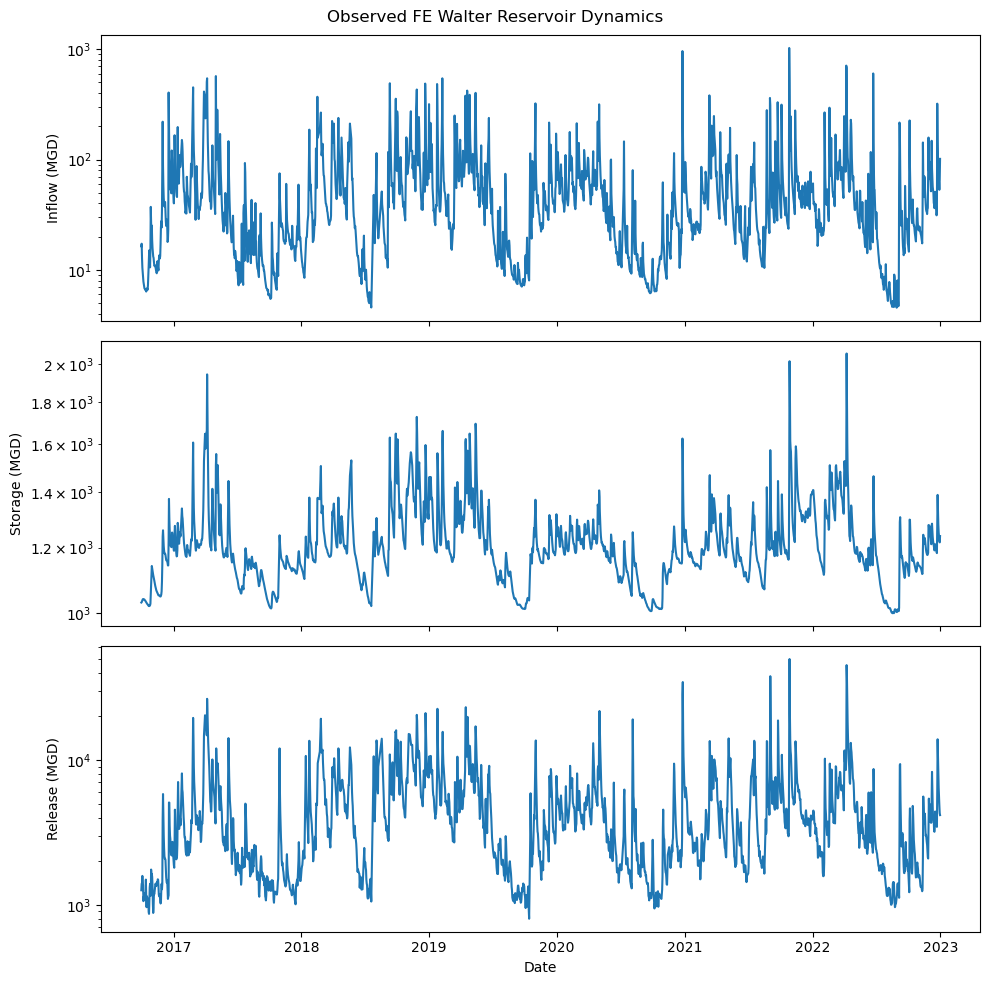

In [21]:
def plot_obs_reservoir_dynamics(I, S, R, reservoir_name, 
                                start_date = None,
                                end_date = None,
                                timescale = 'daily',
                                log=True,
                                fname="reservoir_dynamics.png",
                                title=None):
    
    # subset data
    I = I[[reservoir_name]]
    S = S[[reservoir_name]]
    R = R[[reservoir_name]]
    
    if start_date is not None:
        I = I.loc[start_date:]
        S = S.loc[start_date:]
        R = R.loc[start_date:]
    if end_date is not None:
        I = I.loc[:end_date]
        S = S.loc[:end_date]
        R = R.loc[:end_date]
        
    if timescale == 'monthly':
        I = I.resample('M').sum()
        S = S.resample('M').mean()
        R = R.resample('M').sum()
    elif timescale == 'daily':
        pass
    elif timescale == 'weekly':
        I = I.resample('W').sum()
        S = S.resample('W').mean()
        R = R.resample('W').sum()
    else:
        raise ValueError('timescale must be "daily", "weekly", or "monthly"')
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 10),
                            sharex=True)
    
    axs[0].plot(I.index, I[reservoir_name], label='Inflow')
    axs[0].set_ylabel('Inflow (MGD)')
    
    axs[1].plot(S.index, S[reservoir_name], label='Storage')
    axs[1].set_ylabel('Storage (MGD)')
    
    axs[2].plot(R.index, R[reservoir_name], label='Release')
    axs[2].set_ylabel('Release (MGD)')
    axs[2].set_xlabel('Date')
    
    if log:
        axs[0].set_yscale('log')
        axs[1].set_yscale('log')
        axs[2].set_yscale('log')
    if title is not None:
        plt.suptitle(title)
        
    plt.tight_layout()
    # plt.savefig(fname)
    plt.show()


plot_obs_reservoir_dynamics(I.loc[dt,:], 
                            S.loc[dt,:], 
                            R.loc[dt,:], 
                            reservoir_name, 
                            title='Observed FE Walter Reservoir Dynamics')   

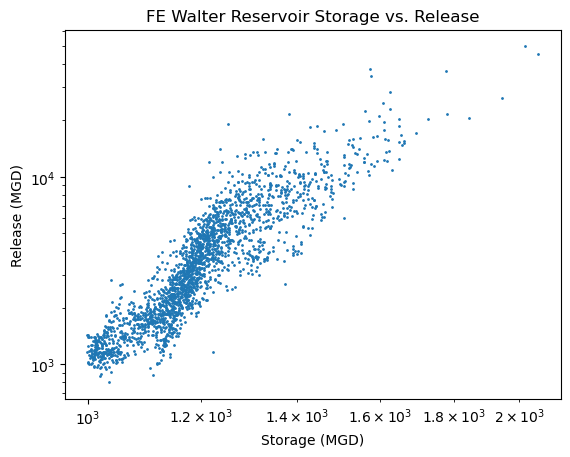

In [ ]:
plt.scatter(S.loc[dt, reservoir_name], R.loc[dt, reservoir_name], s=1)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Storage (MGD)')
plt.ylabel('Release (MGD)')
plt.title('Prompton Reservoir Storage vs. Release')
plt.show()



In [7]:
# plot policy function
reservoir.policy.plot()

# plot dynamics
reservoir.plot()

NameError: name 'reservoir' is not defined